# Determining High Risk level for Developing Lung Cancer based on risk factors


### Background: 
Cancer occurs when cells grows out of control and the growth can never be suppressed. Lung cancer occurs when cancer affects a lung cell where the cell starts to grow
and eventually once its growth gets out of control, some cells leave the lungs and affect other organs in the body. There are two main types of lung cancer- non-small cell 
lung cancer and small cell lung cancer. The main difference between these kinds of cancers is that non-small lung cancer grows at a lower rate compared to small cell lung cancer
and it comprises about 80% of all lung cancers. Chronic lung cancer occurs when lung cancer keeps on persisting in the human body and it eventually gets worse over time leading 
the body to face many potential long-term consequences. The most leading risk factor of lung cancer is smoking and some other risk factors of lung cancer include family history, 
secondhand smoking, and diet. 


#### Brief summary of the dataset and project: 
The dataset "Lung Cancer Prediction" contains data of 1,000 patients with lung cancer on their medical information such as the patient's id, age, and gender as well 
as the amounts of "external" exposure that they were involved in prior to lung cancer on a numerical scale. Using information in this dataset, I will determine what "external" 
exposures or risk factors mostly cause a high risk for developing lung cancer and predict whether an individual has a high, medium or low risk of developing lung cancer. 


#### Why learning about lung cancer matters: 
Lung cancer is the leading cause of cancer death worldwide and it is the second most diagnosed cancer in both men and women in the United States. Many factors can contribute to lung cancer
such as smoking, air pollution, genetic risk, etc. and an individual's risk level of developing lung cancer can heavily rely on how much exposure they receive from these factors. By learning about 
the various risk factors of lung cancer and by predicting the risk level of an individual developing lung cancer based on these factors, doctors can help individuals receive early diagnoses and
medical treatment before lung cancer can start to develop in the body. 


In [1]:
'''
Getting the dataset
'''
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the cancer patient csv file and getting a peek 
df = pd.read_csv("cancer patient data sets.csv")
df.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [2]:
#Looking at the number of patients in the dataset
df['Patient Id'].unique().size

1000


#### Overview of the dataset: 
As mentioned in the summary section above, this data contains medical and external information of 1000 unique patients as well as the symptoms that the patients currently 
have. Some things to note about this dataset are the following: 
    - All categorical variables other than the target variable are already pre-encoded with numerical values in ths dataset. For instance, rather than a "male" and "female" value for labeling gender, 
      the numerical value 1 indicates male while 2 indicates female. For variables that include levels of effect such as no effect,low, medium, high,etc., the levels were up on a rating scale of certain
      values, where higher values indicate higher exposure/risk. 
    - This dataset contains some data that a study in the Natural Medicine journal published that looked over 462,000 people in China for a span of six years. Half of the participants lived in areas
      of high air pollution while the rest lived in areas of low air pollution. 
    - The target variable is the "Level" column with the classifications "Low", "Medium", and "High" and it indicates the risk level of developing lung cancer. 

More information about this dataset can be found in the Kaggle link here:
        https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link


In [4]:
'''
Taking a sneak peak at the data
'''
#Using the decribe() function to view some statistical information about the data 
df.describe()

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

In [5]:
#Viewing some statistical information about the smoking column since it is not present
df['Smoking'].describe()

count    1000.000000
mean        3.948000
std         2.495902
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max         8.000000
Name: Smoking, dtype: float64

In [6]:
#Viewing some statistical information about the passive smoker column since it is also not present
df['Passive Smoker'].describe()

count    1000.000000
mean        4.195000
std         2.311778
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         8.000000
Name: Passive Smoker, dtype: float64

In [7]:
#Checking for null values using the info() function 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               


Assumptions that can be made about this dataset: 
    - From the above table and columns, I can see that all of the minimum values except for the indexes column, have a value of 1 which leads me to assume that 
      there might be no null or missing values present in this dataset which makes data cleaning super easy. This was then verified using the info() function.
    - An interesting thing to note is that the mean value for the "Smoking" column is 3.948 whereas the mean value for "Passive Smoker" aka second hand smoking(individuals 
      who do not smoke but get exposed to smoking air conditions), is 4.195. This seems to suggest that on average patients seem to be more exposed to second hand smoking rather 
      than being involved in smoking themselves. 



### Cleaning the data


In [10]:
#Removing the Patient id column
df =df.drop(columns = ['Patient Id','index'])
df.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1            3                    7         8   
2        7  ...        8            7                    9         2   
3        7  ...        4            2                    3         1   
4        7  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 24 columns]

In [11]:
#Creating a new dataset with all risk factors using the iloc() function 
risk_factors = df.iloc[:,:12]
#Adding in the level column to the new column
risk_factors['Level'] = df['Level']
risk_factors.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker   Level  
0        4        3               2     Low  
1        2        2               4  Medium  
2        7        2               3    High  
3        7        7               7    High  
4        7        8               7    High

In [12]:
#Making sure the new cleaned dataset is the same length as the old dataset
len(risk_factors)

1000

In [13]:
#Double checking for any null rows 
risk_factors.isnull().values.any()

False

In [14]:
#Looking at the different kinds of level in the data 
risk_factors['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [15]:
# Changing the level in the dataset to have numerical values using get_dummies
risk_factors = pd.get_dummies(risk_factors, columns = ['Level'])
risk_factors.head()

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Level_High  Level_Low  Level_Medium  
0        4        3               2           0          1             0  
1        2        2               4           0          0             1  
2        7        2               3           1          0             0  
3        7        7               7           1          0             0  
4        7        8               7           1          0             0


Because I am examining the risk factors of the patients in order to predict the level of risk for developing lung cancer, variables such as patient id and index would not be useful in my predictions.
Moreover, as I can see from all the column names from our info() function that I used previously, I can infer that columns 14-24 (Chest Pain - Snoring)are not also useful in determining the risk level
for determining lung cancer because in this context, I am going to predict whether an individual has a risk level for developing lung cancer and columns 14-24 just lists out the symptoms of the patients 
rather than risk factors so I can drop those columns as well. In order to accomplish that, I created a new dataframe (risk_factors) that contains only the columns that I care about and verified whether 
the new dataframe has any null values. 

Since the target variable, Level, is a categorical varaible that was NOT modified into numerical values, I utilized a technique called one-hot encoding to convert these categorical variables into numeral
ones. The basic idea of one-hot encoding is that it converts each category into individual columns where each column has a value of either 0 or 1 to indicate whether a particular row has that category or 
not. In the case of my dataset, since I have three different levels, "Low", "Medium" and "High", after one-hot encoding my table adds in three additional columns with 0s and 1s to indicate whether that 
risk level is associated with a particular patient. For instance, in the above table, at the 0th row, the level_high and level_medium colums have a value of 0 and a level_low has a value of 1 and this 
shows that this patient had a low risk of developing lung cancer. In order to accomplish one-hot encoding I utilized the function get_dummies() that takes in the dataset and the columns that I want to 
one hot encode.To view more information about one-hot encoding and the get_dummies() function, refer to the links below: 

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html



### Data Representation



Seaborns is a python based visualization tool that relies on matplotlib.There are many kinds of visualizations that can be done using seaborns such as heatmaps which visuallly examines correlations
between all of the variables in a dataset, as well as other basic visualization tools such as scatterplots, box and whisker, etc. In this section, I am mostly going to use seaborn to visually 
examine all of the risk factors and their relationship with my target variable as well as determine whether the risk factors correlate with one another as well. 

To look into more about seaborns and the types of visuals seaborns can implement, refer to the link below: 

https://seaborn.pydata.org/index.html#


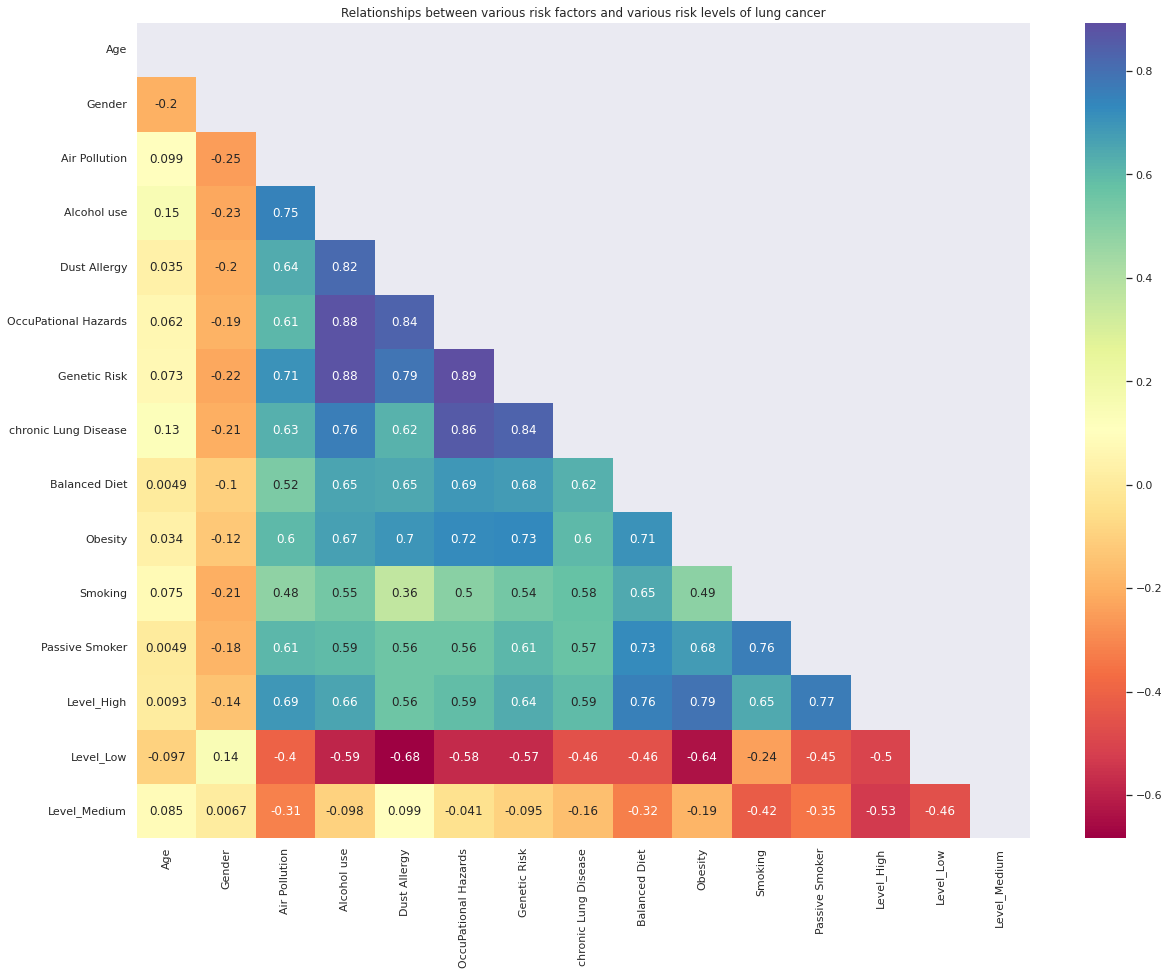

In [37]:
matrix = np.triu(risk_factors.corr())
sns.heatmap(risk_factors.corr(), annot=True, mask=matrix, cmap= "Spectral")
plt.title("Relationships between various risk factors and various risk levels of lung cancer")
sns.set(rc={'figure.figsize':(20,15)})


In order to represent my data, I decided to use a heatmap that displays correlation value between every variable. I used a heatmap because diseases such as lung cancer are caused by various risk factors
and these risk factors are also related with one another as well, therefore a heatmap can successfully display the relationships between various factor that might cause various risk levels of lung cancer.


### Exploratory Analysis


In [23]:
#Looking at the correlation between the feature variables and different level types
risk_factors.corr()

Age    Gender  Air Pollution  Alcohol use  \
Age                   1.000000 -0.202086       0.099494     0.151742   
Gender               -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution         0.099494 -0.246912       1.000000     0.747293   
Alcohol use           0.151742 -0.227636       0.747293     1.000000   
Dust Allergy          0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards  0.062177 -0.192343       0.608924     0.878786   
Genetic Risk          0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease  0.128952 -0.205061       0.626701     0.763576   
Balanced Diet         0.004863 -0.099741       0.524873     0.653352   
Obesity               0.034337 -0.123813       0.601468     0.669312   
Smoking               0.075333 -0.206924       0.481902     0.547035   
Passive Smoker        0.004908 -0.184826       0.606764     0.592576   
Level_High            0.009259 -0.142896       0.692319     0.656258   
Level_Low            -0.096786  0.142881      -0.402653    -0.587038   
Level_Medium          0.084983  0.006652      -0.314827    -0.098031   

                      Dust Allergy  OccuPational Hazards  Genetic Risk  \
Age                       0.035202              0.062177      0.073151   
Gender                   -0.204312             -0.192343     -0.222727   
Air Pollution             0.637503              0.608924      0.705276   
Alcohol use               0.818644              0.878786      0.877210   
Dust Allergy              1.000000              0.835860      0.787904   
OccuPational Hazards      0.835860              1.000000      0.893049   
Genetic Risk              0.787904              0.893049      1.000000   
chronic Lung Disease      0.619556              0.858284      0.836231   
Balanced Diet             0.647197              0.691509      0.679905   
Obesity                   0.700676              0.722191      0.729826   
Smoking                   0.358691              0.497693      0.543259   
Passive Smoker            0.560002              0.555311      0.609071   
Level_High                0.555812              0.589991      0.640261   
Level_Low                -0.683626             -0.575850     -0.572926   
Level_Medium              0.098909             -0.041204     -0.095448   

                      chronic Lung Disease  Balanced Diet   Obesity   Smoking  \
Age                               0.128952       0.004863  0.034337  0.075333   
Gender                           -0.205061      -0.099741 -0.123813 -0.206924   
Air Pollution                     0.626701       0.524873  0.601468  0.481902   
Alcohol use                       0.763576       0.653352  0.669312  0.547035   
Dust Allergy                      0.619556       0.647197  0.700676  0.358691   
OccuPational Hazards              0.858284       0.691509  0.722191  0.497693   
Genetic Risk                      0.836231       0.679905  0.729826  0.543259   
chronic Lung Disease              1.000000       0.622632  0.601754  0.578585   
Balanced Diet                     0.622632       1.000000  0.706922  0.645390   
Obesity                           0.601754       0.706922  1.000000  0.486795   
Smoking                           0.578585       0.645390  0.486795  1.000000   
Passive Smoker                    0.572698       0.725123  0.681889  0.761622   
Level_High                        0.593938       0.755926  0.791475  0.646111   
Level_Low                        -0.459490      -0.460569 -0.638192 -0.244449   
Level_Medium                     -0.158788      -0.323336 -0.186344 -0.421971   

                      Passive Smoker  Level_High  Level_Low  Level_Medium  
Age                         0.004908    0.009259  -0.096786      0.084983  
Gender                     -0.184826   -0.142896   0.142881      0.006652  
Air Pollution               0.606764    0.692319  -0.402653     -0.314827  
Alcohol use                 0.592576    0.656258  -0.587038     -0.098031  
Dust Allergy

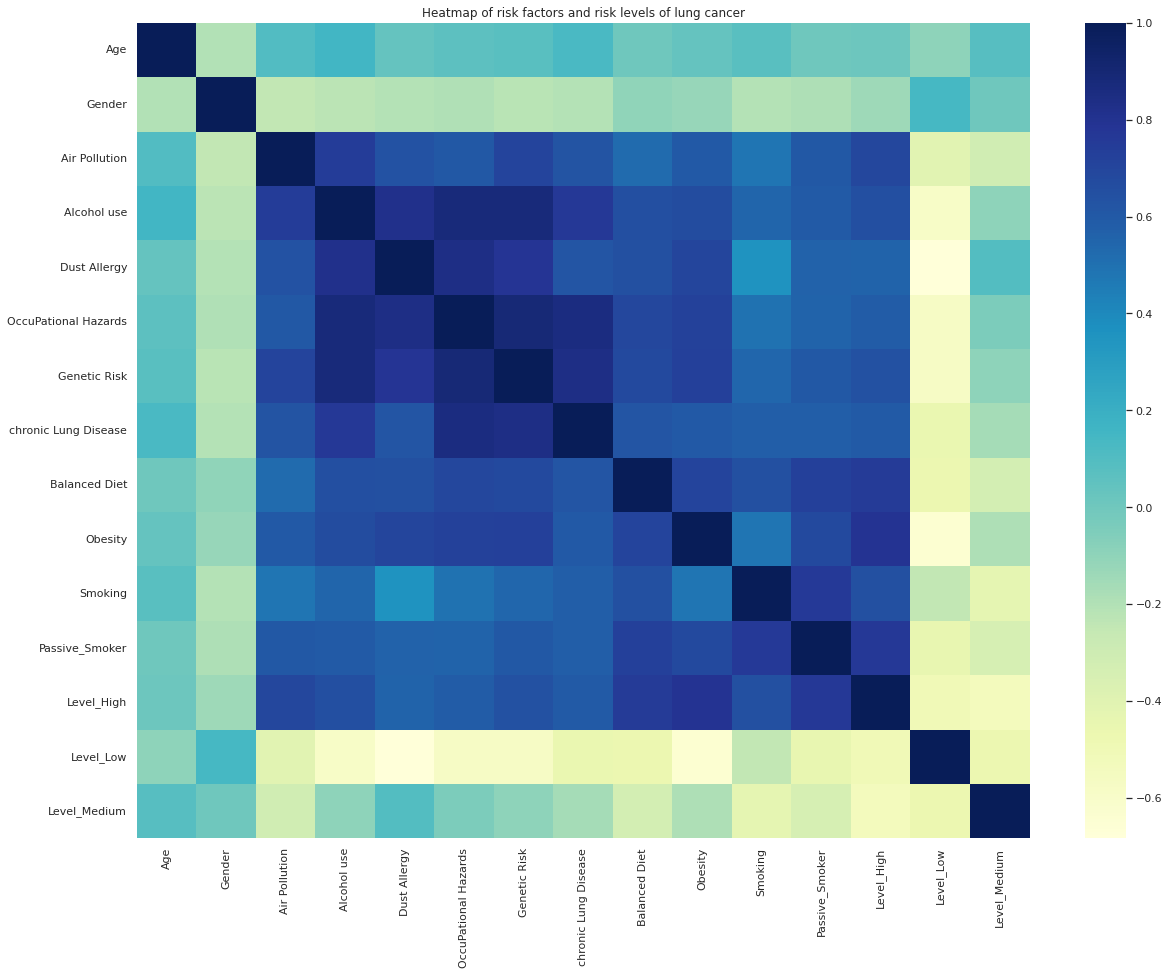

In [317]:
#Creating a visualization of the above table into a heatmap to see correlations 
sns.heatmap(risk_factors.corr(), cmap="YlGnBu")
plt.title("Heatmap of risk factors and risk levels of lung cancer")
sns.set(rc={'figure.figsize':(15,15)})


In order to view the correlation between various potential risk factors and various risk levels, I used the corr() function to numerically view correlations between various 
variables and to visually view it, I also ran a heatmap using seaborns. Based on the heatmap above, I can infer the following:

-Most of the environmental risk factor variables have very small correlations with low risk level for developing lung cancer. This is kind of expected since an individual 
          who is not exposed to any environmental risk factors should have a low probabiltiy of developing lung cancer.   
-Interestingly, gender seems to be slightly correlated with a low risk level of developing lung cancer and age and dust allergy seems to cause a medium risk level of developing
          lung cancer.   
-Most environmental risk factors have quite high correlations with the high risk level of developing cancer. The most risk factors that have the highest correlation with developing
          lung cancer are passive smoker, obesity, balanced diet and smoking. Interestingly, passive smoking seems to have a higher risk of developing lung cancer compared to smoking itself
          and it makes sense because those who are involved in smoking might already have lung cancer and in that scenario, risk levels do not apply.  
-Many of these same environmental risk factors also seem to be highly correlated with one another in addition to being highly correlated to a certain risk level of developing cancer (e.g.
          passive smoker is also as highly correlated with smoking in addition to its correlation with high risk level)


Text(0.5, 1.0, 'Relationship between variables and outcomes of high risk level of lung cancer development')

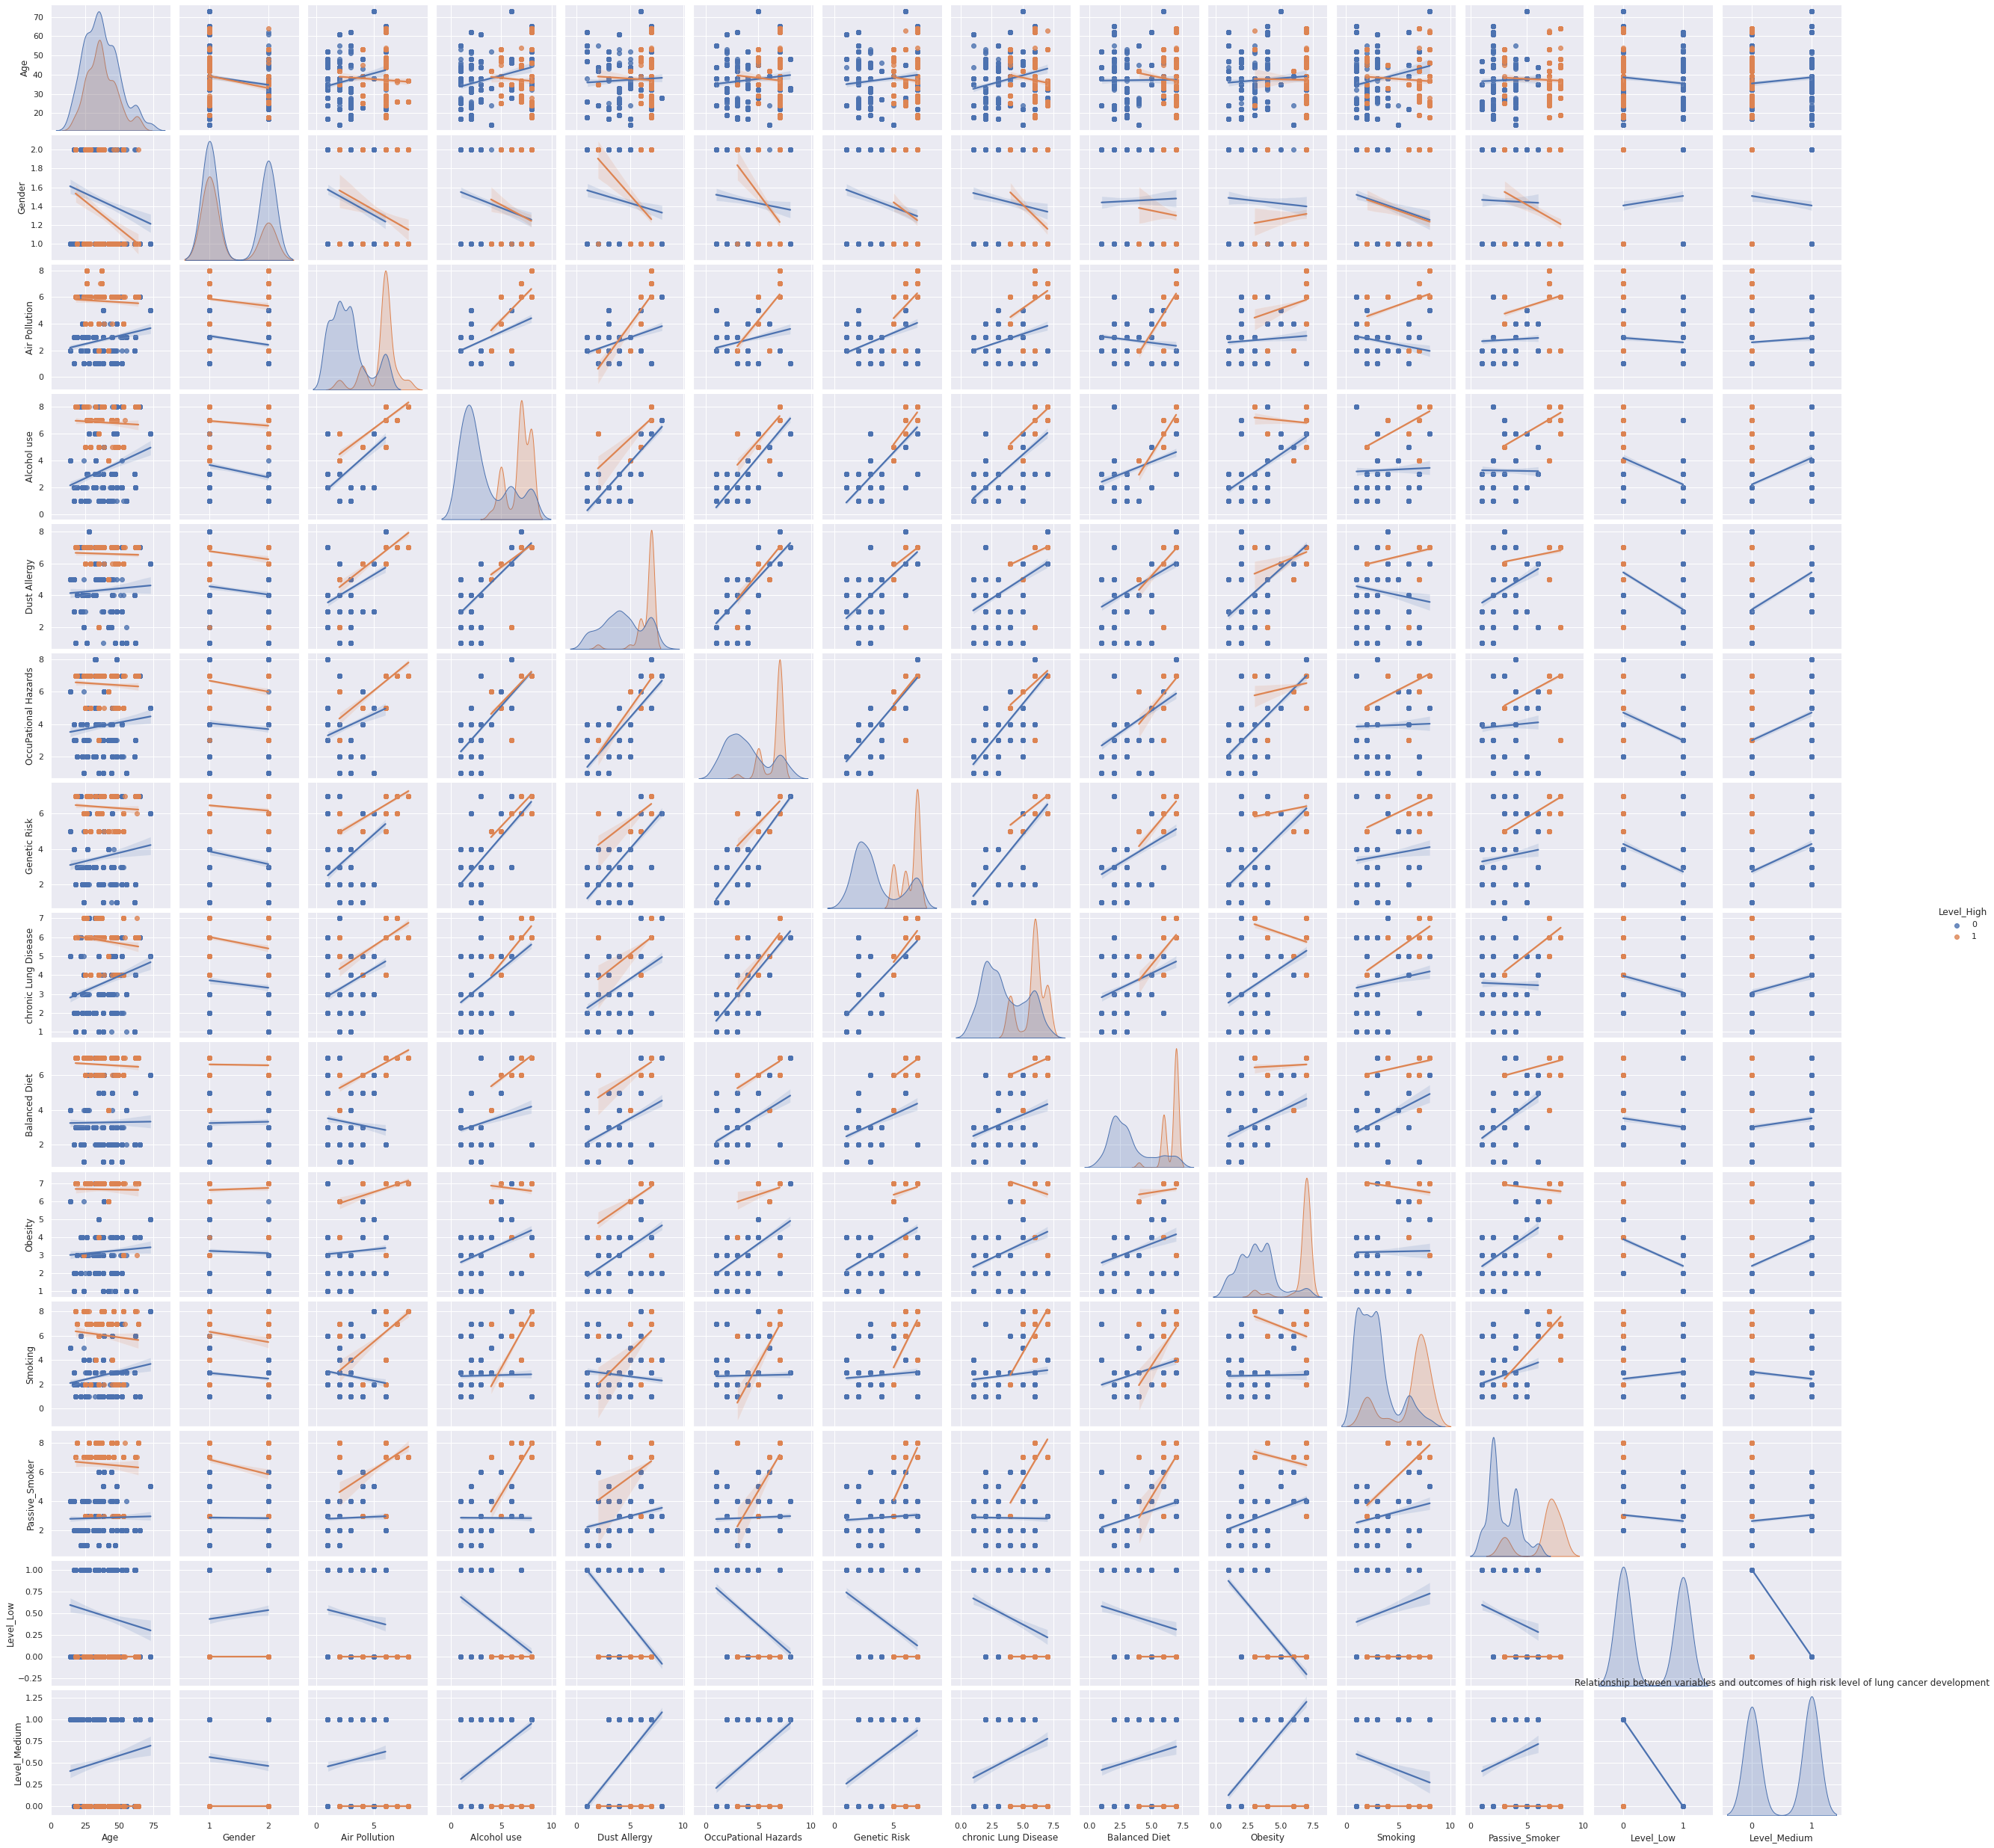

In [318]:
#Looking at relationships between all variables with each other graphically using pairplots. 
sns.pairplot(risk_factors, kind = "reg", hue = "Level_High")
plt.title("Relationship between variables and outcomes of high risk level of lung cancer development")

Text(0.5, 1.0, 'Relationship between variables and outcomes of medium risk level of lung cancer development')

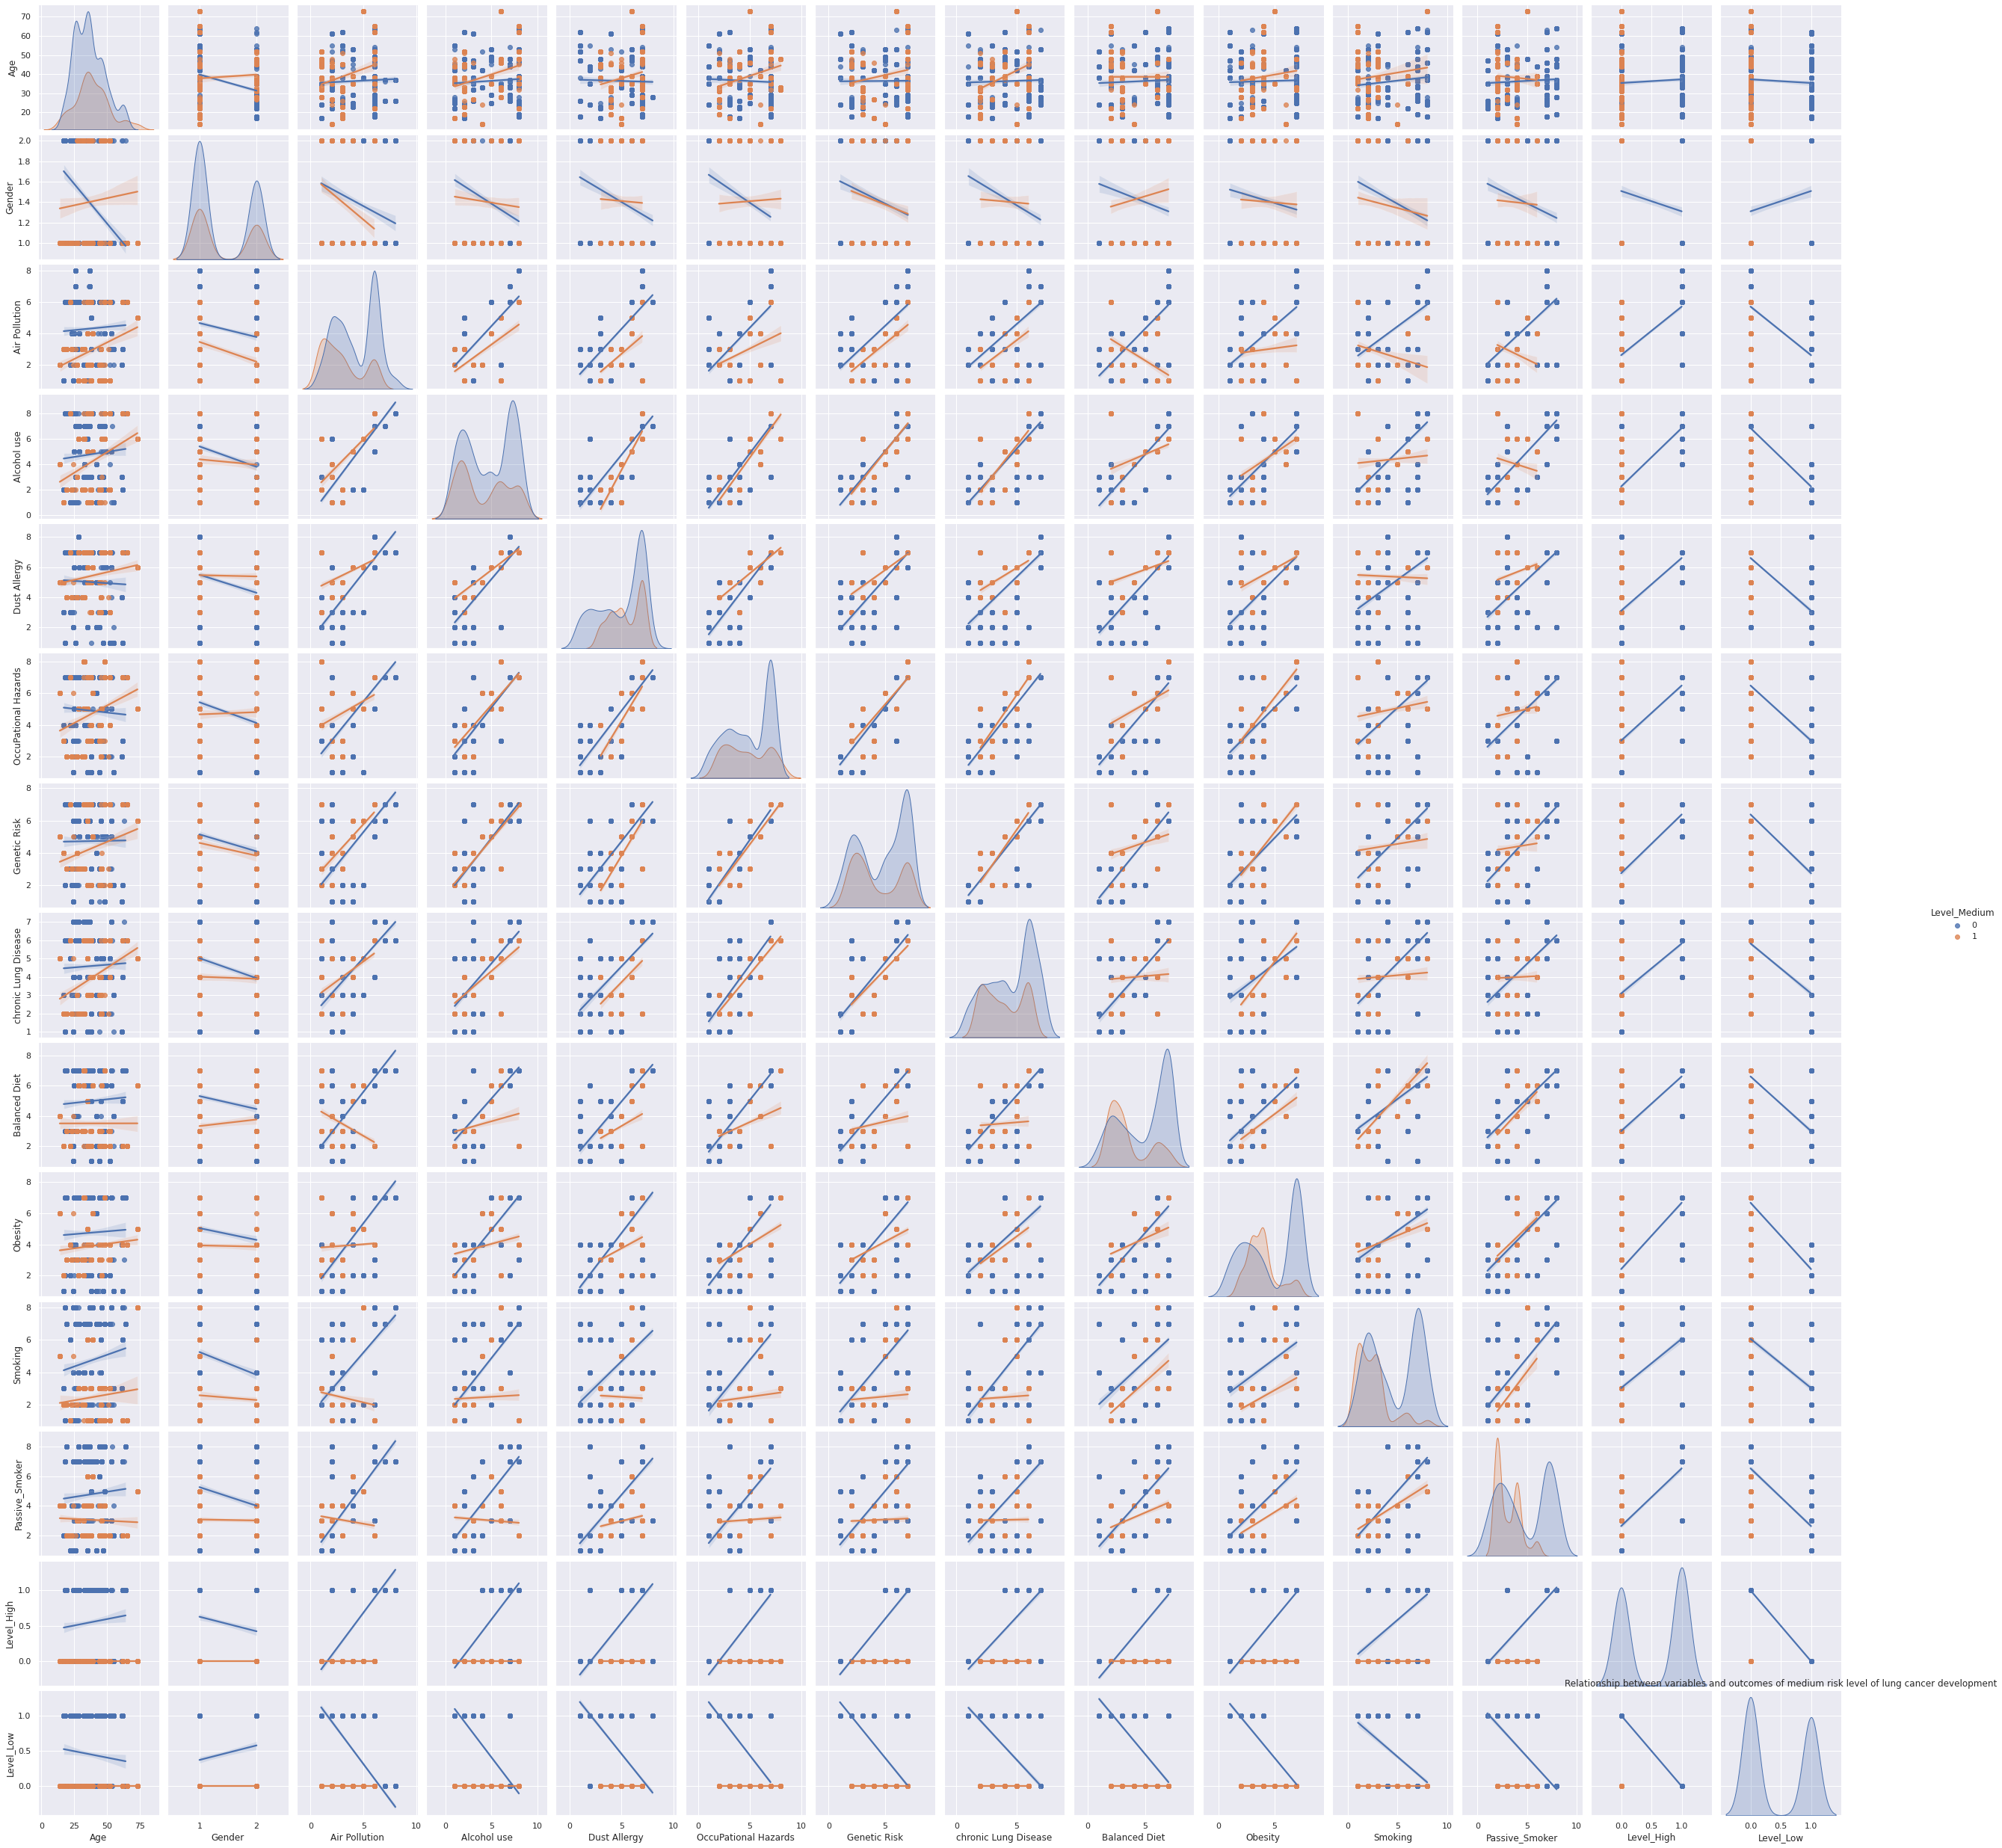

In [322]:
sns.pairplot(risk_factors, kind = "reg", hue = "Level_Medium")
plt.title("Relationship between variables and outcomes of medium risk level of lung cancer development")

Text(0.5, 1.0, 'Relationship between variables and outcomes of low risk level of lung cancer development')

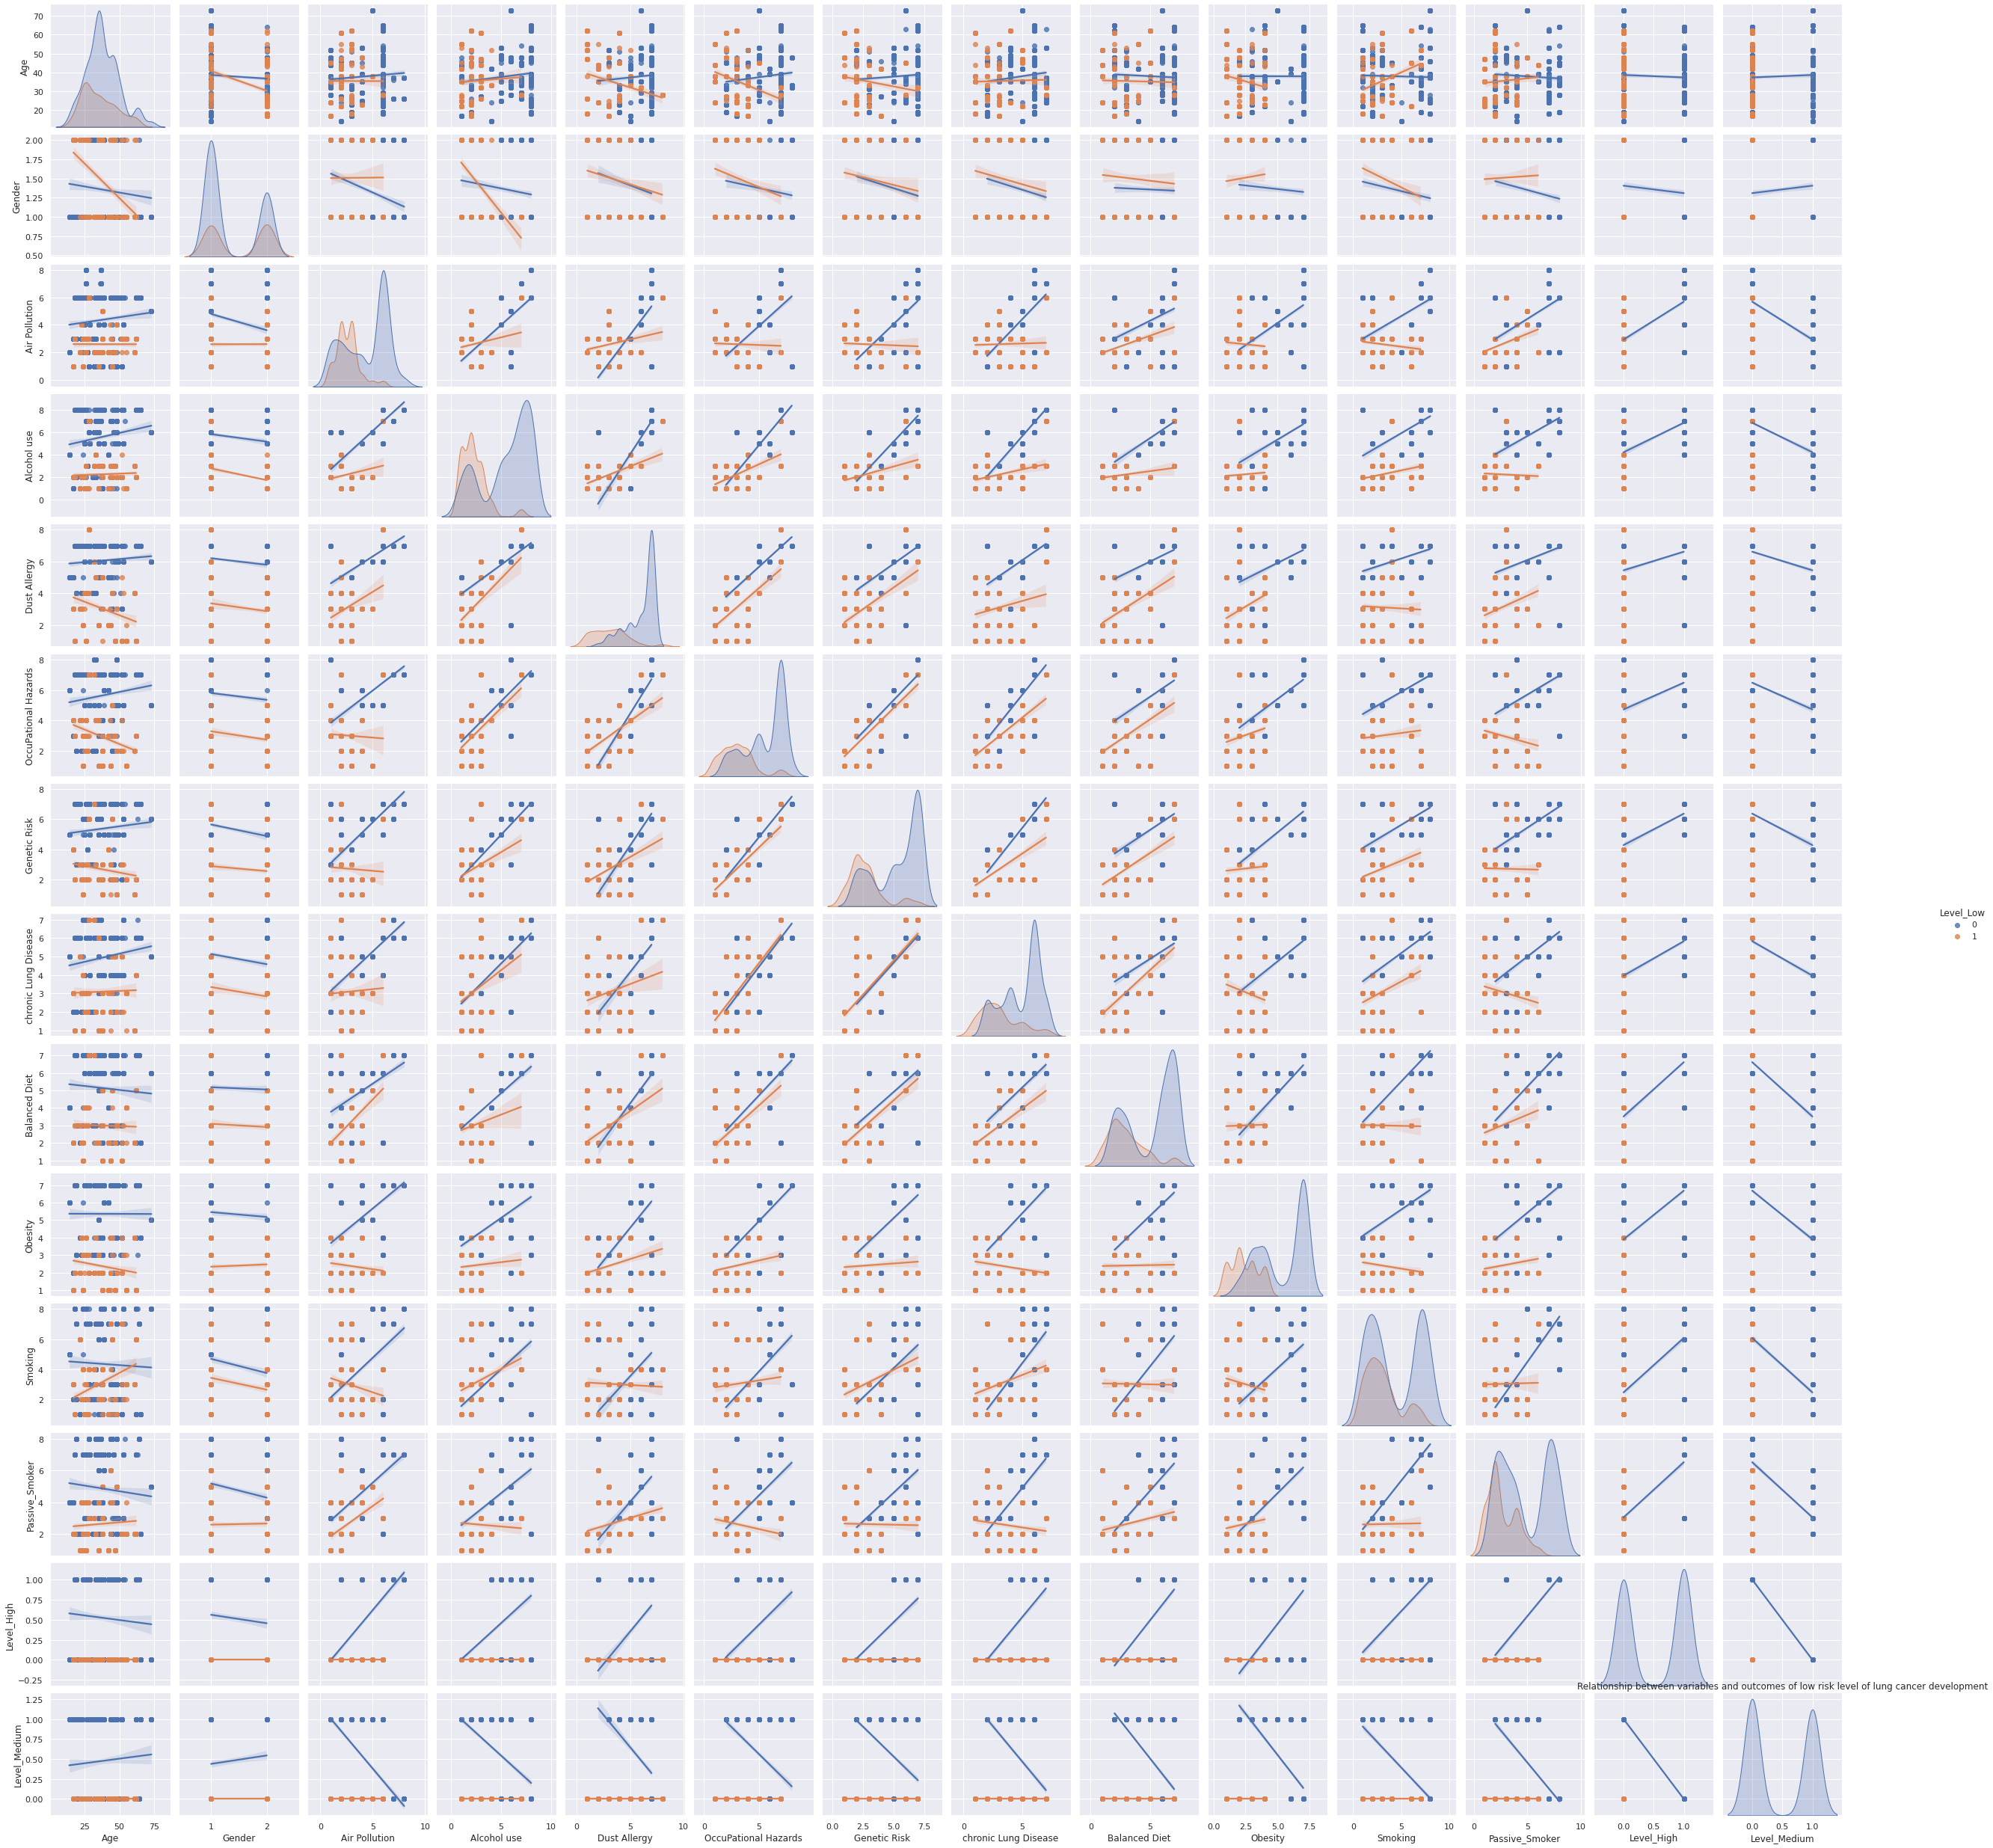

In [325]:
sns.pairplot(risk_factors, kind = "reg", hue = "Level_Low")
plt.title("Relationship between variables and outcomes of low risk level of lung cancer development")


Seaborn pairplots helps us understand the relationships between different variables and how the target variable is connected between these kinds of relationships. Based on the 
inferences that I made based on the heatmap above that environmental risk factors are also correlated with one another in addition to being highly correlated with risk level, 
I used these pairplots to observe how these risk levels are impacted by certain risk factors being related to each other. The pairplot that stood out to me the most for the 
high-risk level is the smoking and passive smoker graph in relation to high risk level because the slope for the high risk level is very steep in comparison to other graphs. 
This indicates that the relationship between passive smoking and smoking may in conjunction affect the risk level of developing lung cancer. 

When a variable intersects itself in the pairplots such as when the smoking x axis intersects with the smoking y axis, seaborns display a distribution plot that shows the frequencies of 
both risk-level and not risk level for various values. For the high risk level pairplots, I can see that the distributions of those who have a high risk of developing lung cancer
based on environment risk factors such as obesity, smoking, etc. are highly negative skewed which shows that high risk levels are more likely due to higher levels of  being 
involved to exposed to these risk factors. Meanwhile for the low risk level pairplots, I can see that these same environemental risk factors are actually more highly postively skewed
which shows that low risk levels are more likely due to lower levels of being involved or exposured to these risk factors (and this intuitively makes sense). Finally, for the medium 
risk level pairplots, I can see that most distributions seem to be multi-model where there are various peaks present at various amounts of exposure/involvement to risk factors.

For more information about seaborns pairplots you can refer to the documentation below: 

https://seaborn.pydata.org/generated/seaborn.pairplot.html



After looking at both the heatmap and pairplots for every variable in my dataset, I can generalize two key ideas that I am going to explore and analyze more in-depth next: 

            1. Based on the heatmap and the pairplots, I can see that there is a very high correlation between passive smoker and a high risk level of developing lung cancer
               and passive smoker is also as equally correlated with smoking itself. This fact is going to led me have the following questions: 
                               - Is there a correlation between passive smoker and smoking present in low and medium levels? 
                               - Is there a correlation between passive smoking and smoking in general?
                               - Since both passive smoker and smoking are at a rating scale of 1-8, does higher exposure/involvement of passive smoking lead to higher risk or does 
                                 higher exposure/involvement of smoking lead to higher risk of developing lung cancer? 
            2. Based on the heatmap, the top four risk factors that are the most correlated with a high risk of developing lung cancer are obesity, passive smoking, smoking, and balanced
               diet. Thus, the main question that I have is the following: At what scale do these factors start to become more "closer" to becoming high risk?
            3. Because low level and medium level risk are not correlated with any risk factor, we can "ignore" these risk levels and focus more on the high risk level in the next sections
               
In the next part, I am going to answer these main questions using box-and-whisker and scatterplots from seaborns. 


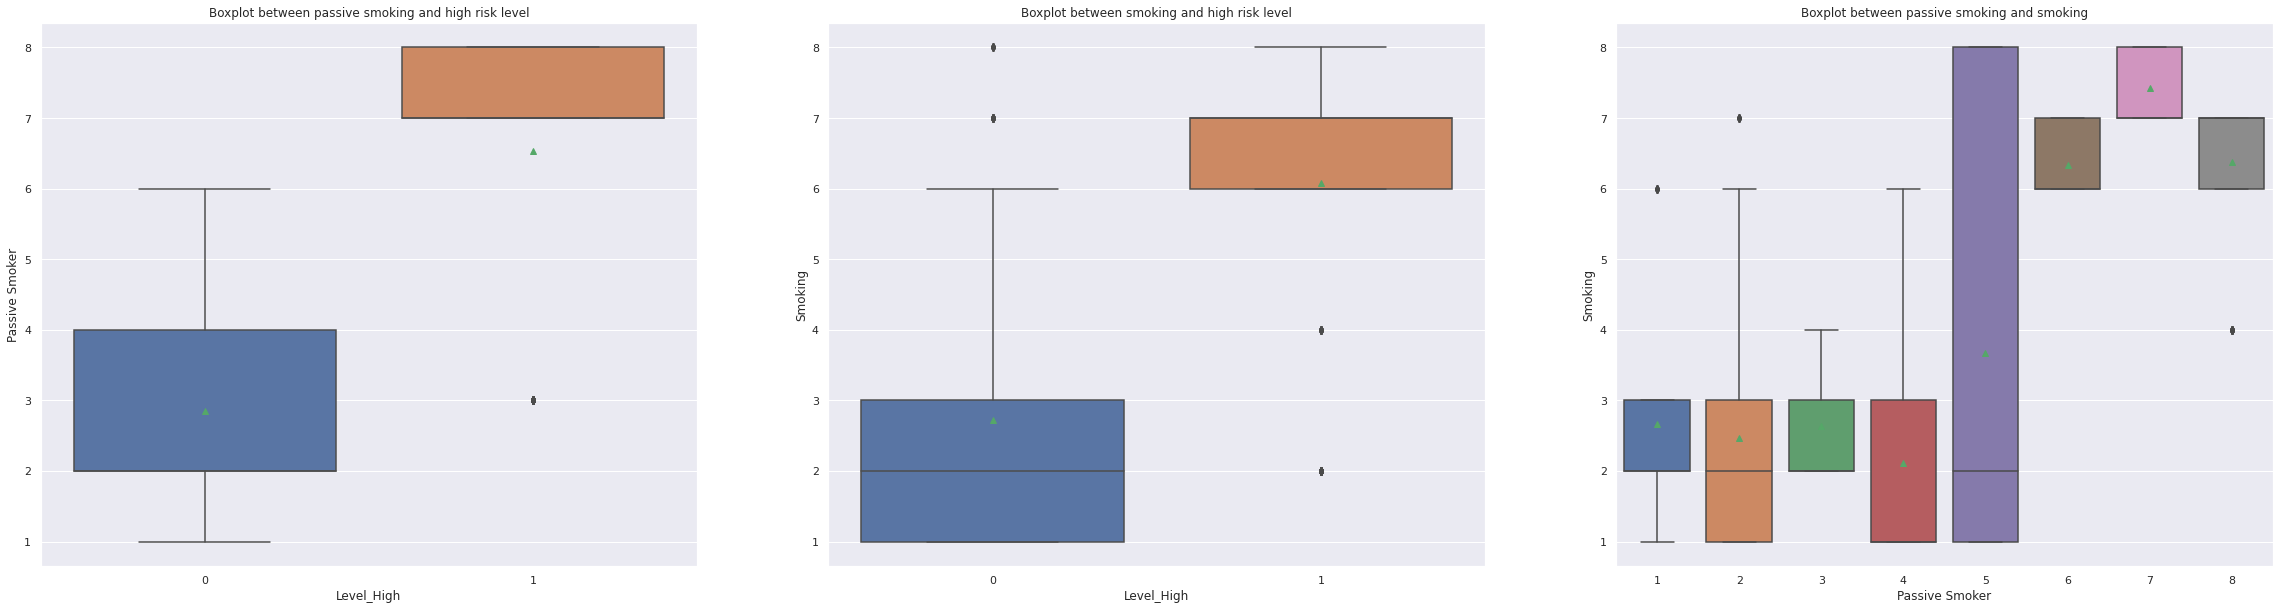

<Figure size 4320x4320 with 0 Axes>

In [25]:
#Creating two box-whisker plots for passive smoking vs. high risk level and for smoking vs. high risk level
fig,axs = plt.subplots(1,3)
plt.figure( figsize = (60,60))
#box-whisker plot for passive smoking and high risk level
sns.boxplot(ax=axs[0], data = risk_factors, x = "Level_High",y="Passive Smoker", showmeans = True)
axs[0].set_title("Boxplot between passive smoking and high risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and high risk level
sns.boxplot(ax=axs[1], data = risk_factors, x = "Level_High",y="Smoking", showmeans = True)
axs[1].set_title("Boxplot between smoking and high risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and passive smoker
sns.boxplot(ax=axs[2], data = risk_factors, x = "Passive Smoker",y="Smoking", showmeans = True)
axs[2].set_title("Boxplot between passive smoking and smoking")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()

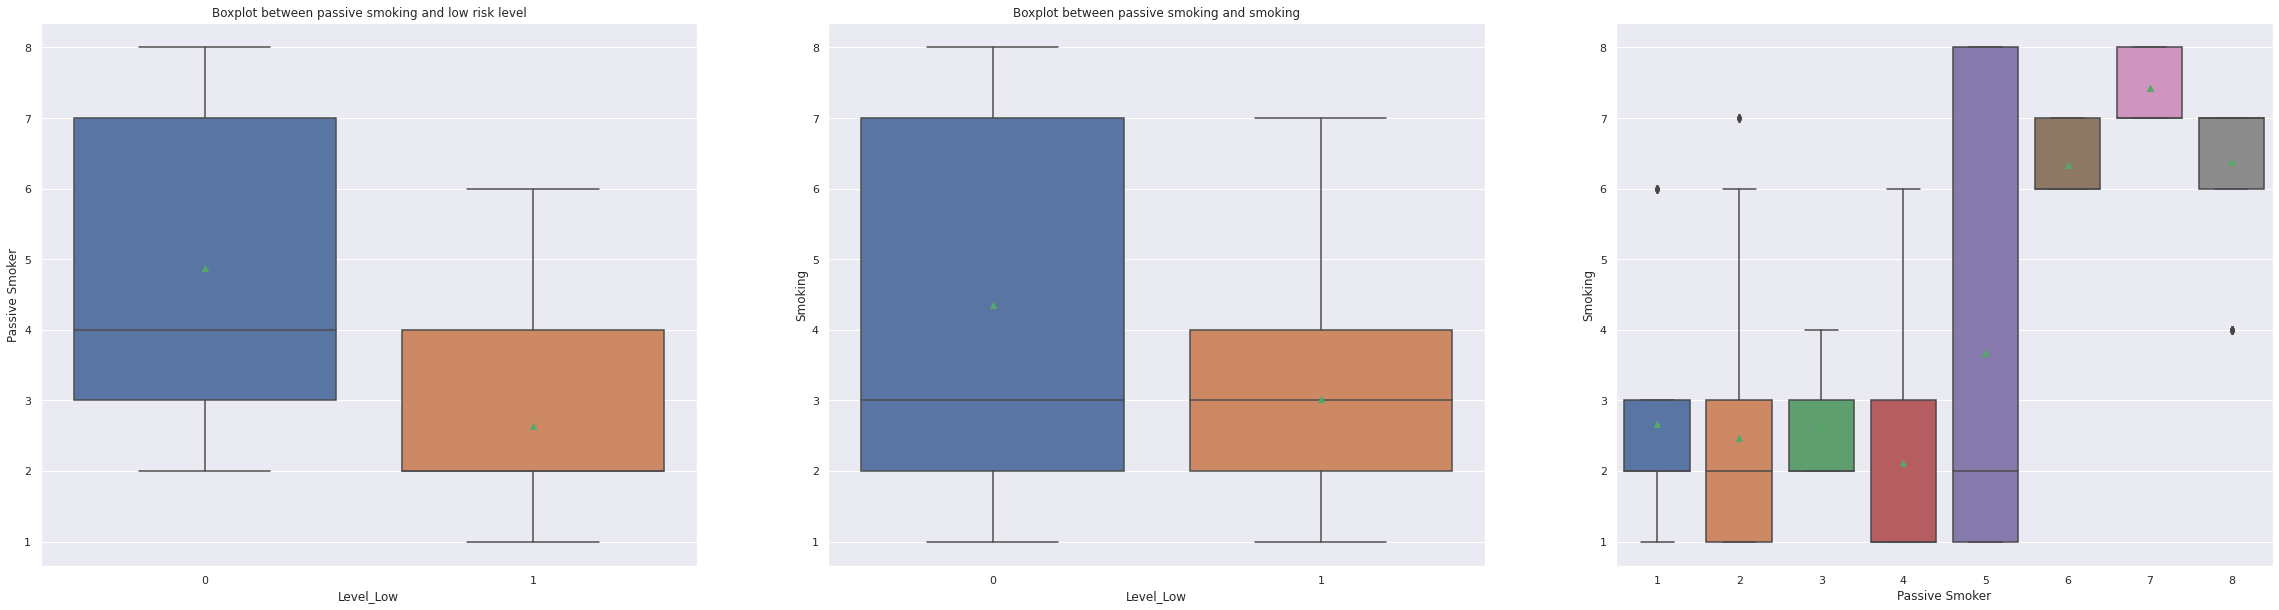

<Figure size 4320x4320 with 0 Axes>

In [26]:
#Creating two box-whisker plots for passive smoking vs. low risk level and for smoking vs. low risk level
fig,axs = plt.subplots(1,3)
plt.figure( figsize = (60,60))
#box-whisker plot for passive smoking and high risk level
sns.boxplot(ax=axs[0], data = risk_factors, x = "Level_Low",y="Passive Smoker", showmeans = True)
axs[0].set_title("Boxplot between passive smoking and low risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and high risk level
sns.boxplot(ax=axs[1], data = risk_factors, x = "Level_Low",y="Smoking", showmeans = True)
axs[1].set_title("Boxplot between smoking and low risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and passive smoker
sns.boxplot(ax=axs[2], data = risk_factors, x = "Passive Smoker",y="Smoking", showmeans = True)
axs[1].set_title("Boxplot between passive smoking and smoking")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()

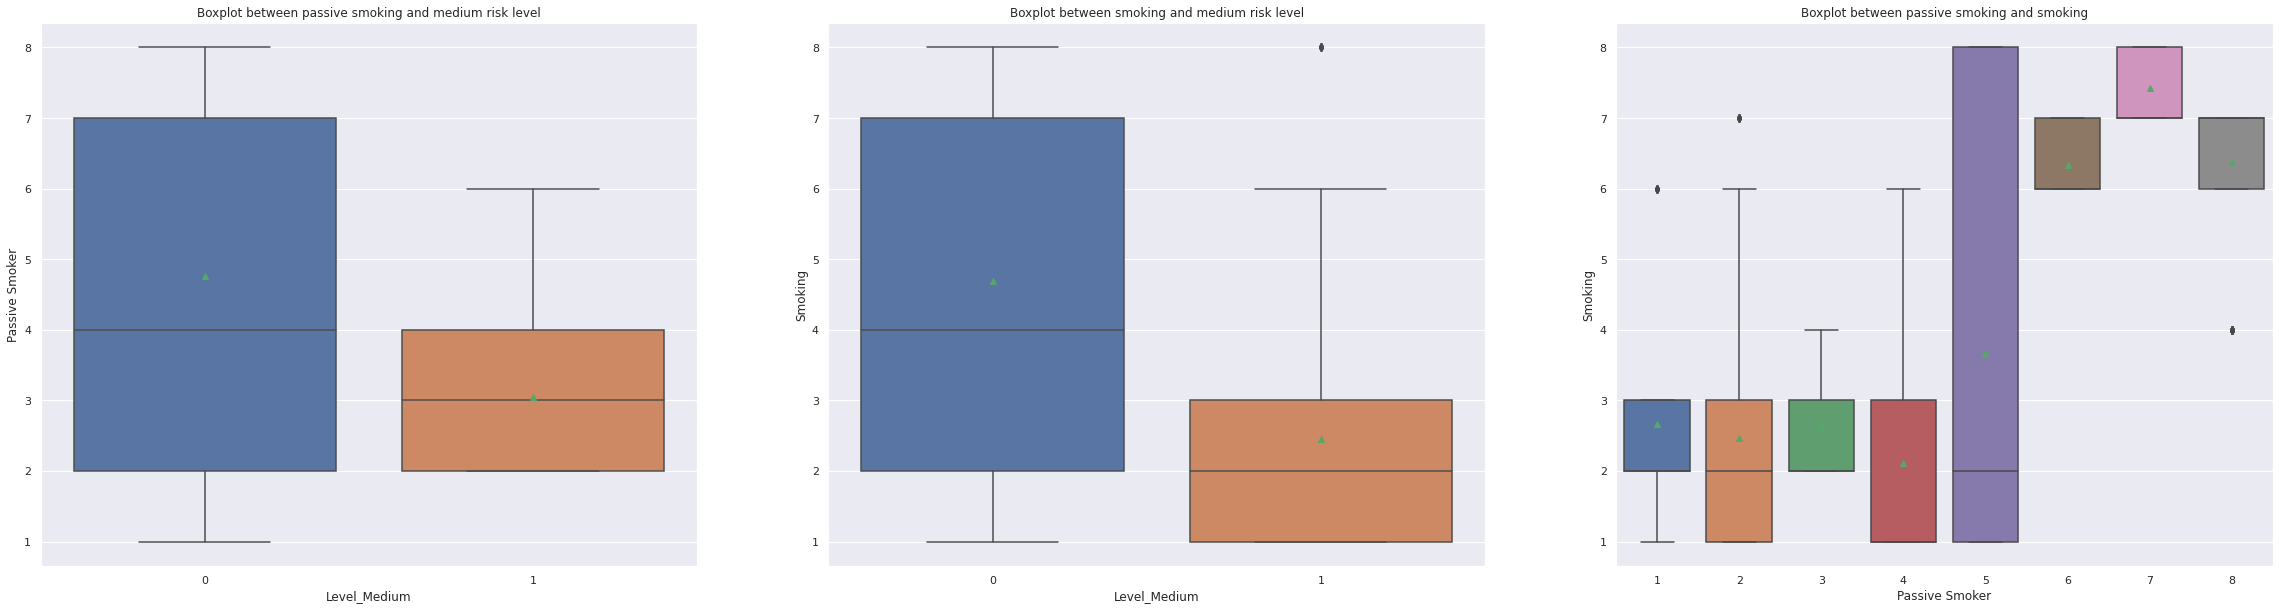

<Figure size 4320x4320 with 0 Axes>

In [27]:
#Creating two box-whisker plots for passive smoking vs. medium risk level and for smoking vs. medium risk level
fig,axs = plt.subplots(1,3)
plt.figure( figsize = (60,60))
#box-whisker plot for passive smoking and high risk level
sns.boxplot(ax=axs[0], data = risk_factors, x = "Level_Medium",y="Passive Smoker", showmeans = True)
axs[0].set_title("Boxplot between passive smoking and medium risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and high risk level
sns.boxplot(ax=axs[1], data = risk_factors, x = "Level_Medium",y="Smoking", showmeans = True)
axs[1].set_title("Boxplot between smoking and medium risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for smoking and passive smoker
sns.boxplot(ax=axs[2], data = risk_factors, x = "Passive Smoker",y="Smoking", showmeans = True)
axs[2].set_title("Boxplot between passive smoking and smoking")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()

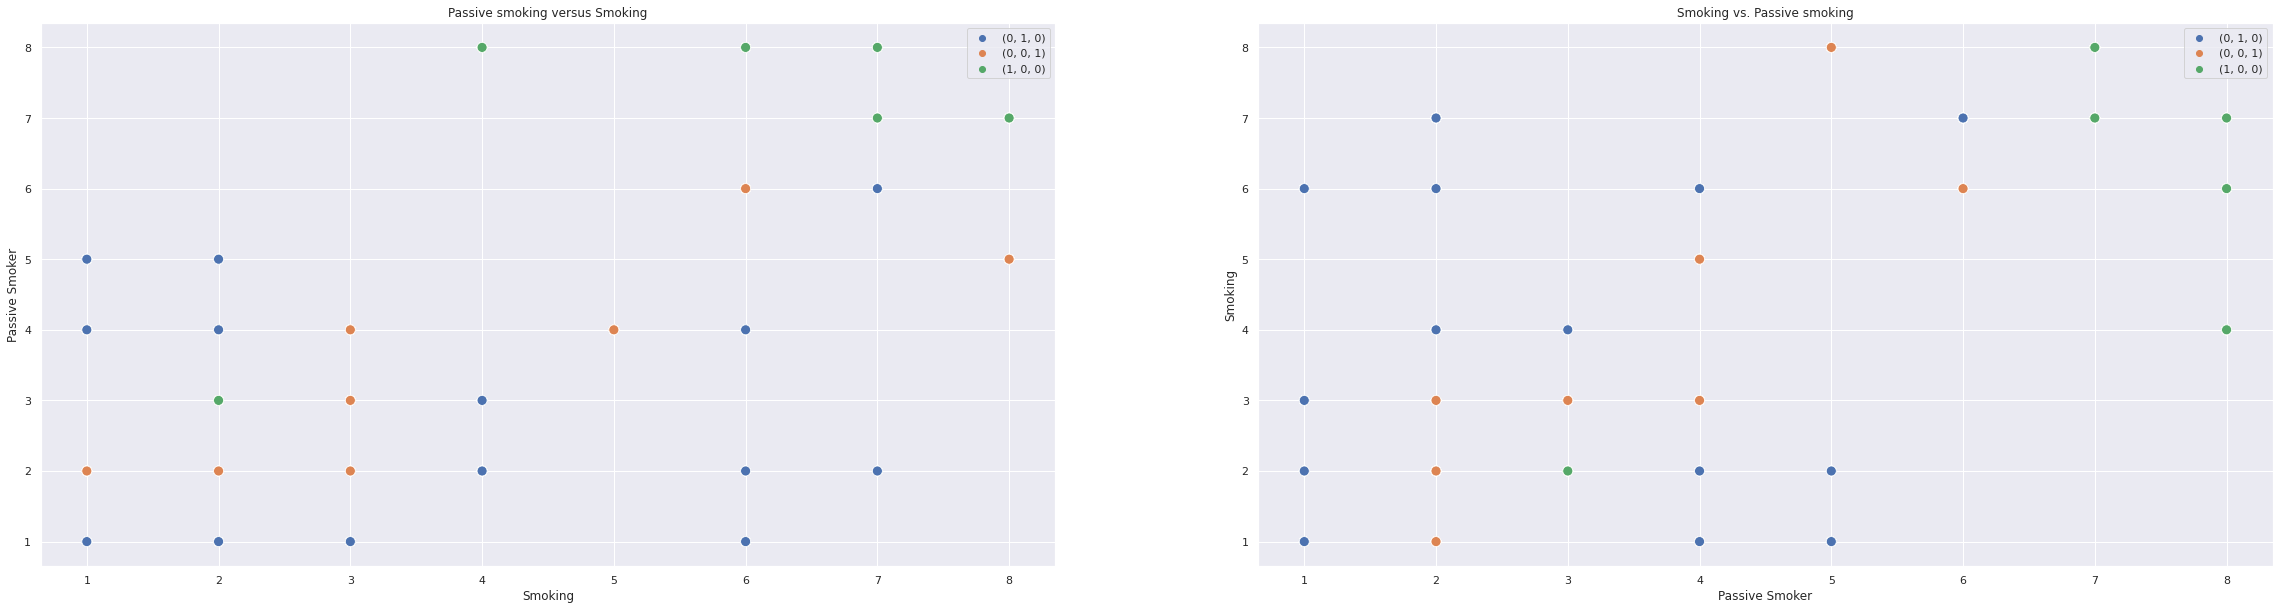

<Figure size 4320x4320 with 0 Axes>

In [28]:
# Creating scatter plots that determine a relationship between passive smoking and smoking 
fig,axs = plt.subplots(1,2)
plt.figure( figsize = (60,60))
#scatter plot for passive smoking vs. smoking 
sns.scatterplot(ax=axs[0], data = risk_factors, x = "Smoking",y="Passive Smoker", s =100, hue = risk_factors[['Level_High', 'Level_Low','Level_Medium']].apply(tuple, axis=1))
axs[0].set_title("Passive smoking versus Smoking")
sns.set(rc={'figure.figsize':(40,10)})
#scatter plot for smoking vs. passive smoking 
sns.scatterplot(ax=axs[1], data = risk_factors, x = "Passive Smoker",y="Smoking", s = 100, hue = risk_factors[['Level_High', 'Level_Low','Level_Medium']].apply(tuple, axis=1))
axs[1].set_title("Smoking vs. Passive smoking")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()

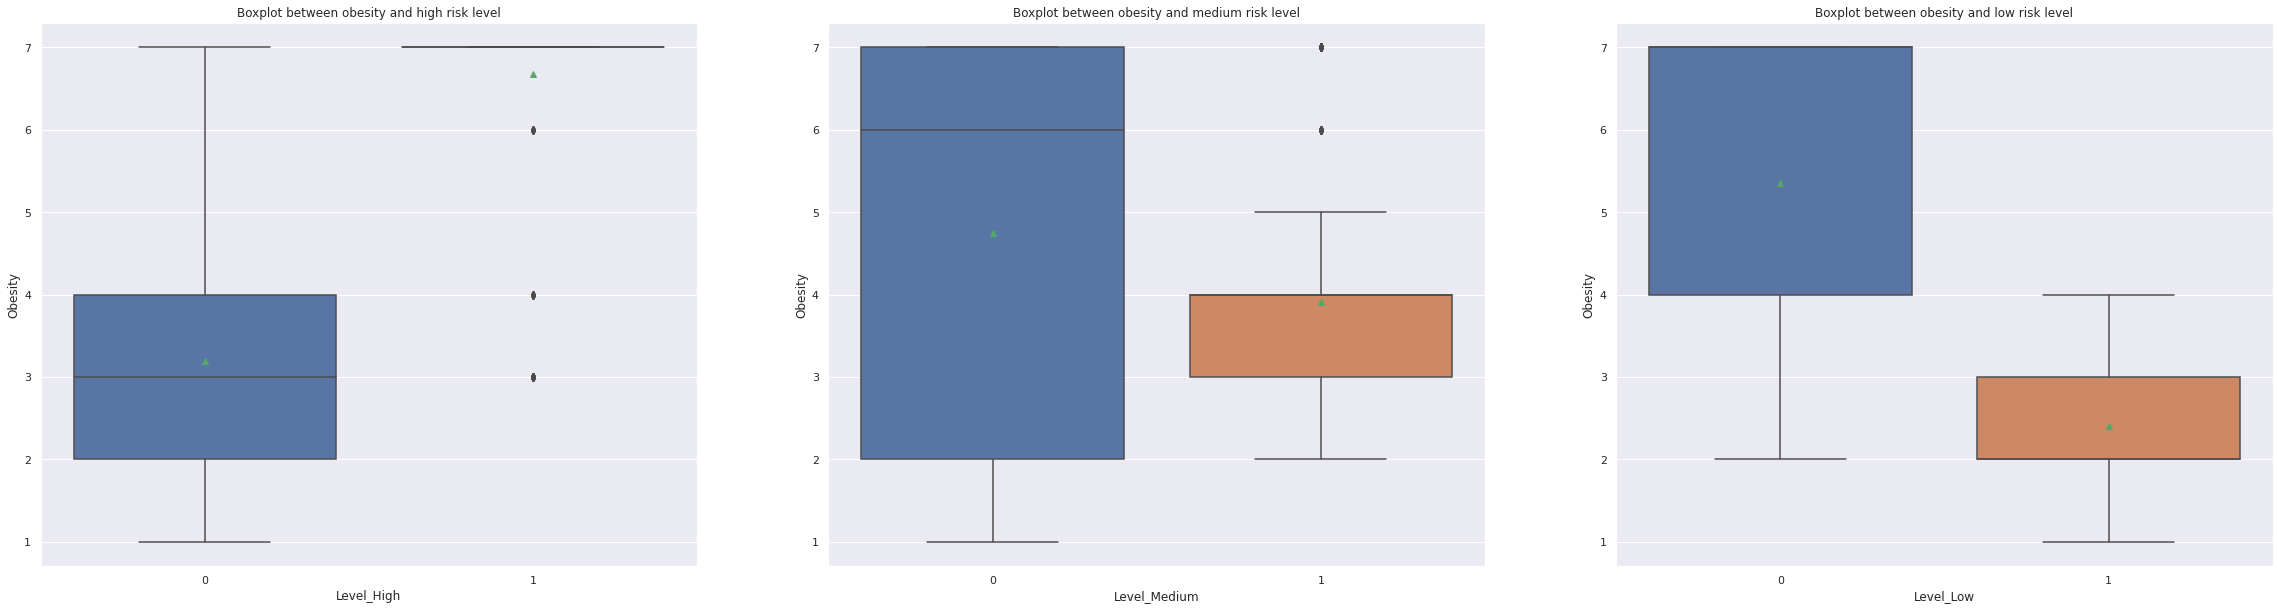

<Figure size 4320x4320 with 0 Axes>

In [29]:
#Creating three box-whisker plots for obesity vs. high risk level, obesity vs. low risk level, and obesity vs. medium risk level
fig,axs = plt.subplots(1,3)
plt.figure( figsize = (60,60))
#box-whisker plot for obesity and high risk level
sns.boxplot(ax=axs[0], data = risk_factors, x = "Level_High",y="Obesity", showmeans = True)
axs[0].set_title("Boxplot between obesity and high risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for obesity and medium risk level
sns.boxplot(ax=axs[1], data = risk_factors, x = "Level_Medium",y="Obesity", showmeans = True)
axs[1].set_title("Boxplot between obesity and medium risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for obesity and low risk level
sns.boxplot(ax=axs[2], data = risk_factors, x = "Level_Low",y="Obesity", showmeans = True)
axs[2].set_title("Boxplot between obesity and low risk level")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()

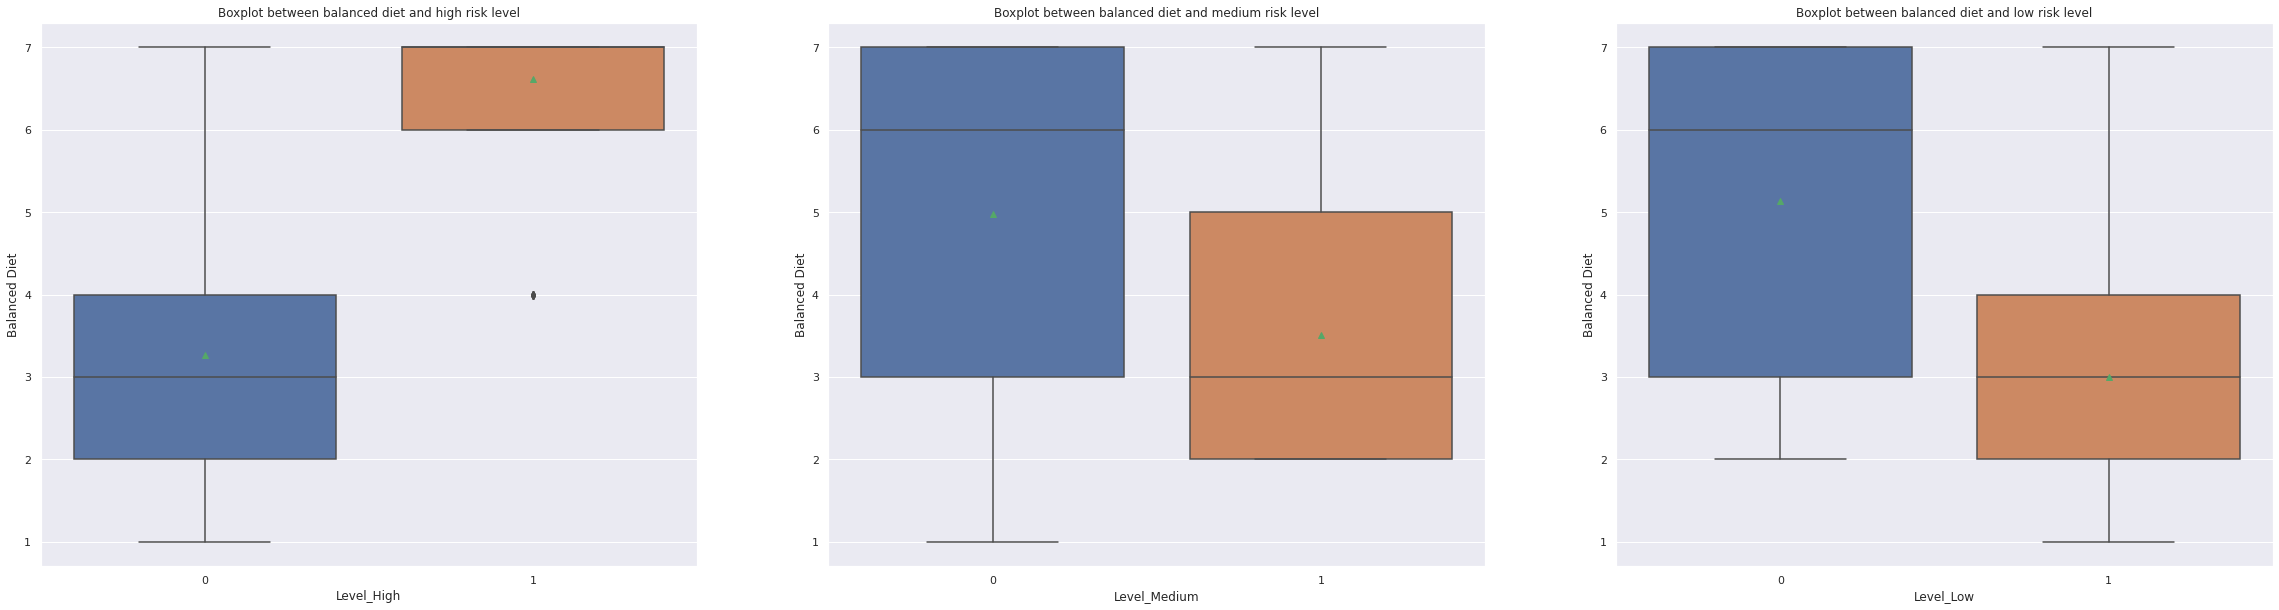

<Figure size 4320x4320 with 0 Axes>

In [30]:
#Creating three box-whisker plots for balanced diet vs. high risk level, balanced diet vs. low risk level, and balanced diet vs. medium risk level
fig,axs = plt.subplots(1,3)
plt.figure( figsize = (60,60))
#box-whisker plot for balanced-diet and high risk level
sns.boxplot(ax=axs[0], data = risk_factors, x = "Level_High",y="Balanced Diet", showmeans = True)
axs[0].set_title("Boxplot between balanced diet and high risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for balanced-diet and medium risk level
sns.boxplot(ax=axs[1], data = risk_factors, x = "Level_Medium",y="Balanced Diet", showmeans = True)
axs[1].set_title("Boxplot between balanced diet and medium risk level")
sns.set(rc={'figure.figsize':(40,10)})
#box-whisker plot for balanced-diet and low risk level
sns.boxplot(ax=axs[2], data = risk_factors, x = "Level_Low",y="Balanced Diet", showmeans = True)
axs[2].set_title("Boxplot between balanced diet and low risk level")
sns.set(rc={'figure.figsize':(40,10)})
plt.show()


##### Overview of the box-whisker and scatter plots: 
As I mentioned previously, in order to analyze my main exploratory questions, I made use of seaborns box-and-whisker plots and scatter plots as generated above. For the 
box-and-whisker plots, I set showmeans to True, so that I can look at the mean in addition to the median (which is marked with small green triangles). After generating 
the box plots, I realized that some boxes do not contain a median line, and I assume that these median lines are the slightly bolder edges of those boxes. To explore more about
passive smoking, smoking, and various risk levels of developing lung cancer, I created box plots that examines each of these variables relation with various risk levels as well 
as a box plot that examines each of these variables with each other. Finally I generated two scatter plots to  see a correlation between passive smoking and smoking. The blue dots
in the scatterplot correspond to the medium risk level, the orange ones correspond to low risk level and the green ones correspond to high risk level. 



##### Going back and answering my main questions: 

  Question 1: Is there a correlation between passive smoker and smoking present in low and medium levels? 
    Ans:-Based on the boxplots that examine passive smoking/smoking and medium and low levels of developing lung cancer I found that 
         for low risk levels, the median of passive smoking is 2 and the average is between the ranges 2-3 while the median of smoking
         is 3 with and the average is also 3. However, looking at the boxplot between passive smoker and smoking, I see that when at a 
         scale of 2 for passive smoking, the median smoking is also at a scale of 2 with an average of around 2.5 and there are a couple
         of outliers present on the upper quartile range. In the case of the medium risk level, the scalings seem to have switched for
         these two variables- the median for passive smoking is at a scale of 3 with an average while the median for smoking is at a
         scale of 2 with an average of around 2.5. Interestingly, when using the same boxplot for passive smoking and smoking, I found 
         that a scale of 3 for passive smoking does align with a median scale of 2 for smoking. In order to further investigate I plotted
         a scatterplot of passive smoking vs. smoking and smoking vs. passive smoking. However, based on the scatterplot, I can see that
         the medium and low risk points for both graphs seem to be random and there is no fixed pattern, but for high risk points I found 
         that most points were clustered around the higher scale ranges. Thus, this leads me to conclude that NO there is no correlation 
         between passive smoking and smoking present in low and medium risk levels BUT a higher scale of smoking and passive smoking combined 
         is associated with high risk levels of lung cancer development. 
         
  Question 2: Is there a correlation between passive smoking and smoking in general?
     Ans:- As mentioned in the previous answer, there is in fact NO correlation between passive smoking and smoking but higher scales of both 
           variables combined can lead to higher risk of lung cancer. This also intuitively makes sense because those involved in smoking also 
           are more likely to be involved in passive smoking since they are inhaling the same air that they are smoking in.

  Question 3: Since both passive smoker and smoking are at a rating scale of 1-8, does higher exposure/involvement of passive smoking lead to higher risk or does 
  higher exposure/involvement of smoking lead to higher risk of developing lung cancer? 
      Ans:- Looking at the Higher risk level and passive smoking boxplot, I observe that the median scale for passive smoking is 7 whereas looking at the higher risk
            level and smoking boxplot, I find that the median scale for smoking is 6. This means that in order to achieve a high risk of lung cancer, a slightly higher
            exposure of passive smoking is neccessary compared to smoking which illustrates that smoking at lower scales does increase the chances for lung cancer development. 
            Looking at the boxplot between passive smoking and smoking as well, when matched with a scale of 6 for passive smoking, the median scale of smoking is 7. This must
            mean that smoking can cause more exposure to passive smoking which in turn increases the risk level for lung cancer. 

  Question 4: At what scale do other factors start to become more "closer" to becoming high risk?
    Ans:- For obesity the median scale for low risk level is 2 with an average of 2.5, for medium risk level the median scale is 3 with an average of 3.5 and for high the median 
          scale is 7 with an average of 6.5 (due to outliers). This suggests that obesity is associated with high risk levels at extreme scale levels. For balanced diet, the low level
          median scale was 3 with an average of 3, the medium level median scale was also 3 with an average scale of around 3.5, and finally the high level median scale is 7 with an 
          average of around 6.5. This shows that extreme unbalanced diet scales is associated with high risk (note: higher scales for balanced diet indicate higher POOR balanced diets). 




### Hypothesis Testing



Based on our exploratory analysis I can come up with the following hypothesis: 

Hypothesis Statement: Passive Smoking and Smoking combined along with obesity and balanced diet are significantly correlated to whether an individual has a high risk of developing 
lung cancer. 

Null hypothesis: Passive Smoking and Smoking combined along with obesity and balanced diet are not significantly correlated to whether an individual has a high risk of developing 
lung cancer. 

In order to test these hypothesises, I am going to utilize a one-way ANOVA to test the correlation between passive smoking and smoking with high risk of lung development and I am going to 
utilize the student's T test to test the correlation between the rest of the variables and a high risk level of lung development. A one-way ANOVA test is used the statistically significant 
difference between two or more independent groups by comparing the means and the student's T test is also used to test the statisfically significant difference by comparing means but it tests the 
difference between two independent groups instead. 

More information about a one-way ANOVA test and student's T-test can be found here: 

https://www.pythonfordatascience.org/anova-python/

https://www.statisticshowto.com/probability-and-statistics/t-test/


In [156]:
import statsmodels.formula.api as smf

#Renaming the Passive Smoker column for better access 
risk_factors = risk_factors.rename(columns={"Passive Smoker":"Passive_Smoker"})
#Conducting a one-way ANOVA test for passive smoking, smoking and high risk level
anova_df = risk_factors[['Passive_Smoker','Smoking','Level_High']]
anova = smf.ols(formula='Level_High ~ Passive_Smoker*Smoking', data=anova_df).fit()
anova.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Level_High   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     610.5
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          4.47e-225
Time:                        02:43:32   Log-Likelihood:                -166.26
No. Observations:                1000   AIC:                             340.5
Df Residuals:                     996   BIC:                             360.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2133      0.048      4.459      0.000       0.119       0.307
Passive_Smoker            -0.0124      0.014     -0.910      0.363      -0.039       0.014
Smoking                   -0.1133      0.013     -8.713      0.000      -0.139      -0.088
Passive_Smoker:Smoking     0.0311      0.003     12.118      0.000       0.026       0.036
==============================================================================
Omnibus:                      320.073   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              976.865
Skew:                           1.592   Prob(JB):                    7.52e-213
Kurtosis:                       6.648   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: The p-value parameter in the ANOVA test corresponds to the P > |t| column 


From the generated table above I can see that passive smoking has a p-value of 0.363, smoking has a p-value of 0.00 and passive smoking+ smoking 
has a p-value of 0.00. From here I can tell that passive smoking itself is NOT statistically significant since it has a p-value greater than 0.05
and in terms of risk level of lung cancer development, this must mean that passive smoking itself is NOT highly correlated with a high risk of lung 
cancer development. However, when looking at smoking itself and smoking+passive smoking combined, both of these factors are statistically significant 
since the p-value is lower than 0.05 which must mean both of these factors are highly correlated with a high risk level for developing lung cancer. 
In terms of human health this table can be interpreted this way: Passive smoking itself cannot cause an individual to be at high risk for developing 
lung cancer HOWEVER, smoking itself can definitely cause an individual to be at high risk for developing lung and passive smoking along with smoking 
can also cause an individual to at a high risk level for lung cancer development.


In [69]:
from scipy.stats import ttest_ind as t_test

#Conducting a Student's T test for obesity and high level risk for lung cancer 
t_test(risk_factors['Obesity'],risk_factors['Level_High'])


Ttest_indResult(statistic=59.50598407404544, pvalue=0.0)

In [75]:
#Conducting a Student's T test for balanced diet and high risk level for lung cancer 
t_test(risk_factors['Balanced Diet'],risk_factors['Level_High'])

Ttest_indResult(statistic=59.60034520196742, pvalue=0.0)


After conducting the student's T test for both Obesity and Balanced Diet I found that all of the variables smoking+passive smoking, obesity, and balanced diet
have a p-value of 0 whoch signals that all of these variables are statistically significant and are in fact correlated with high risk of lung cancer development. 
This means that we can reject our null hypothesis.



### Machine Learning 



In order to predict whether an individual has a high risk of developing lung cancer, I am going to use the following machine learning algorithms: 

-Random Forests

-Support Vector Machine 

In addition I am also going to utilize the following evaluation metrics to evaluate how well my algorithms performed: 

-Accuracy/Precision/Recall


In [179]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.formula.api import logit


#### Random Forest 
A random forest is a classification machine learning algorithm that randomly selects samples from the data and generates different decision trees based on
those randomly selected samples and choses the decision option with the highest votes from the randomly generated decision trees. Although generating a large 
amount of trees is time and memory consuming, a random tree provides both flexibility and high accuracy which is the main reason I chose this particular 
algorithm to classify high risk level for developing lung cancer. 

For more information about random forests refer to the link below: 
    
https://www.ibm.com/cloud/learn/random-forest


In [288]:
#Seperating between the level and the rest of the variables from our hypothesis
X = risk_factors.iloc[:, 8:12]
Y = risk_factors.loc[:,'Level_High']
#Dividing the testing and training data such that 70% of the data is the training set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size  = 0.7, random_state = 4)

In [289]:
#Fitting the training data into a random forest 
randomForest = RandomForestClassifier()
randomForest.fit(X_train, Y_train)
randomForest.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], d

In [290]:
#Predicting using the test data 
prediction = randomForest.predict(X_test)


After running a random forest through our testing set, we can get the above results in the form of an array where each entry represents a patient in our data and whether that 
patient has a high level of developing lung cancer (marked as 1) or whether that patient does not have a high level of developing lung cancer(0). In order to compare this result 
with the actual results on order to measure how accurate it is I am going to utilize the evaluation metrics that I mentioned previously. 



#### Accuracy/Precision/Recall

Accuracy is defined as the percentage of results that my algorithm predicted that was actually correct. Precision defines the number of actual high risk levels within the results that 
stated high risk level by the random forest. Finally, recall is the the number of results that my algorithm got correct out of all the high-risk levels. 

To view more information about accuracy,precision, and recall refer to the link here: 
    
https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers
 

In [293]:
#Getting accuracy of my predictions 
randomForest.score(X_test,Y_test)

1.0

In [294]:
#Getting precision and recall for my random forest
prediction = randomForest.predict(X_test)
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300




Based on a random forest, I can see that the accuracy, precision, and recall all have a value of 1.0 which signals that the random forest algorithm was 
able to accurately predict everything in both the training and testing set. While this may prove that my random forest performed very well, it could 
also pose the following issues: A) that my random forest overfit my training data and the testing set coincidentally matches up with this overfitted model or
B) That I have conducted something wrong while running a random forest. In order to see if I have conducted something wrong, I am going to compare my random 
forest model with my support vector machine model. 



#### Support Vector Machine 
A support vector machine is both a classification and regression algorithm that utilizes a hyperplane in order to distinct data points. The hyperplane 
depends on the number of features that the algorithm contains such that if there are two features, the hyperplane will be a line. Support vector machines 
are super useful since they perform high dimensional features and here I am considering four features, however the downside of support vector machines is that 
they cannot well with data that have noise (which is not an issue for this data hence why I considered this algorithm).

You can find more information anbout support vector machines below: 
    
https://www.geeksforgeeks.org/support-vector-machine-algorithm/


In [297]:
#Fitting the training data into a support vector machine 
svm = SVC(kernel = "linear")
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [298]:
#Getting the accuracy of the svm 
svm.score(X_test,Y_test)

0.9366666666666666

In [299]:
#Getting precision and recall for my Support Vector Machine 
prediction = svm.predict(X_test)
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       185
           1       0.89      0.96      0.92       115

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.94      0.94       300




Here we can see that the accuracy, precision, and recall for my support vector machine is lower compared to my random forest algorithm which eliminates the fact that I have conducted
something wrong. This means that my random forest might have overfitted and the testing set also matched up with the overfitted model. 

My support vector machine machine model overall has an accuracy of approximately 0.94 which means that while the model did not perform as well as my random forest, it is has still performed quite well.
Moreover, most of  the precision and recall values for both not high risk and high risk are also above .90 which is still quite good, however the precision for high risk is 0.89. With some hypertuning, 
I will try to improve this support vector machine model then compare the change in accuracy, precision and recall. 



#### Hyper-Parameter Tuning with Support Vector Machines 
Hyper-Parameter tuning is when I pass in arguments to my support vector machine modelbefore fitting that model into my training sets in order to 
get more accurate results. The hyperparameters associated with a support vector machine are kernel functions, gamma, and C. In order to tune my
support vector machine, I am going to make the following adjustments to my hyperparameters: 
            - Kernel: For the kernel, since I am focusing on four variables, I am going to change the kernel function from linear to poly with a degree of 4 
              in order to reflect my four variables.
            - Gamma: I am going to set my gamma to a value of .01 (low gamma) because I want my support vector machine to be influenced by farther data points 
            - C: I am going to set my C value to 0.5 (medium C) so that my support vector machine does not care too much about getting every single point right (leads to overfitting) 
              nor does it care too much about the decision boundary of the support vector machine. 
              
To learn more about hyperparameter tuning with Support Vector machines, refer to the link below: 
    
https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167


In [305]:
#Creating a new svm with modified hyperparameters 
new_svm = SVC(kernel = "poly", degree = 4, gamma= 0.01, C = 0.5)
#Fitting the new svm
new_svm.fit(X_train,Y_train)

SVC(C=0.5, degree=4, gamma=0.01, kernel='poly')

In [306]:
#Getting the accuracy of the support vector machine
new_svm.score(X_test,Y_test)

0.94

In [307]:
prediction = new_svm.predict(X_test)
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       185
           1       0.89      0.97      0.92       115

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300




After hyperparameter tuning my support vector machine, I was able to improve the accuracy for my support vector machine by barely 0.01 or 1% which is
minimal improvement to my model. However, the precision and recall values of my new model has increased by 1% whichshows  slight but better improvement
compared to accuracy. Unfortunately the precision value for high risk is still at 0.89 which isn't too bad but can be further improved. 



### Closing Summary: 
The dataset that I received from Kaggle got data from 1000 patients and labeled each patient as whether they at high,low,or medium risk of developing lung cancer.
Based on the data, I was primarily interested in investigating how various risk factors can lead to a high risk level of developing lung cancer. In order to investigate
this, I used heatmaps to get an idea of how different risk factors correlate and utilized boxplots and scatterplots to further analyze the top four risk factors and 
their relation to various risk levels (with a more focus on high risk level). After exploring and analyzing the data, I hypothesized that passive smoking combined with 
smoking along with obesity and balanced diet significantly correlate with high risk levels of developing lung cancer and using the one-way ANOVA and Student T test, the
p-values signaled that my hypotheis is significant. Finally, I used support vector machines and random forests to predict whether a patient has a high risk for developing 
lung cancer. After fitting a random forest model, I found that the accuracy of my fitted model is 100% which caused suspicion at first at whether I have conducted my 
training and testing sets wrong, however after fitting the support vector machine, I was able to conclude that my random forest might have overfit. To improve the 
accuracy of my support vector machine, I used hyperparameter tuning and modified the kernel function, gamma and C values of my support vector machine and was able to
lift up my accuracy by 1%.

Side note about accuracy on this dataset: After I saw the 100% accuracy on my random forest I went to the Kaggle website an revistied this dataset and looked at how
other users utlized this data on the "Code" tab and I found that all of the users got an accuracy of 100% when they implemnted a random forest. This must mean that
there might be some kind of bias present when the data was put up or Kaggle or random forest does seem to overfit too much on this dataset. This in order to truly 
test out my algorithms, I would need to utilize other patient datasets and determine how accurate my algorithm will be on those dataets. 
